In [6]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


['0' '0' '11' '0' '16' '0' '0' '0' '4' '0' '7' '8' '3' '0' '0' '0' '0' '0'
 '9' '7' '0' '0' '0' '0' '0' '0' '16' '0' '0' '0' '0' '0' '0' '1' '14'
 '11' '11' '11' '0' '0' '0' '0' '0' '7' '0' '0' '0' '0' '0' '0' '9' '2'
 '4' '0' '0' '0' '0' '0' '0' '0' '3' '5' '0' '0']
(111, 64)
<U2
[['0' '0' '11' '0' '16' '0' '0' '0']
 ['4' '0' '7' '8' '3' '0' '0' '0']
 ['0' '0' '9' '7' '0' '0' '0' '0']
 ['0' '0' '16' '0' '0' '0' '0' '0']
 ['0' '1' '14' '11' '11' '11' '0' '0']
 ['0' '0' '0' '7' '0' '0' '0' '0']
 ['0' '0' '9' '2' '4' '0' '0' '0']
 ['0' '0' '0' '0' '3' '5' '0' '0']]
[[0.     0.     0.6875 0.     1.     0.     0.     0.    ]
 [0.25   0.     0.4375 0.5    0.1875 0.     0.     0.    ]
 [0.     0.     0.5625 0.4375 0.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.875  0.6875 0.6875 0.6875 0.     0.    ]
 [0.     0.     0.     0.4375 0.     0.     0.     0.    ]
 [0.     0.     0.5625 0.125  0.25   0.     0.     0.    ]
 [0.     0.     0

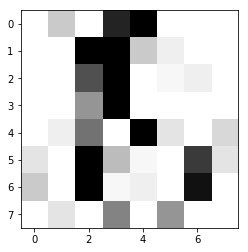

In [7]:
with open('knn/data1.csv', 'r') as datafile:
    data = np.array(list(csv.reader(datafile)))
    print (data[0])
    print (data.shape)
    print(data.dtype)
    print(data[0].reshape(8,8))
    print(np.float32(data[0].reshape(8,8)) / np.float32(16))
    plt.imshow(np.float32(data[4].reshape(8,8)) / np.float32(16), cmap=matplotlib.cm.Greys)
    plt.show()

k =   1   accuracy is 0.7387387387387387
k =   2   accuracy is 0.7567567567567568
k =   3   accuracy is 0.7477477477477478
k =   4   accuracy is 0.8108108108108109
k =   5   accuracy is 0.8198198198198198
k =   6   accuracy is 0.7747747747747747
k =   7   accuracy is 0.7567567567567568
k =   8   accuracy is 0.8378378378378378
k =   9   accuracy is 0.7567567567567568
k =  10   accuracy is 0.8018018018018018
k =  11   accuracy is 0.8378378378378378
k =  12   accuracy is 0.8378378378378378
k =  13   accuracy is 0.8468468468468469
k =  14   accuracy is 0.8468468468468469
k =  15   accuracy is 0.8378378378378378
k =  16   accuracy is 0.8378378378378378
k =  17   accuracy is 0.8468468468468469
k =  18   accuracy is 0.8378378378378378
k =  19   accuracy is 0.8468468468468469
k =  20   accuracy is 0.8648648648648649
k =  21   accuracy is 0.8558558558558559
k =  22   accuracy is 0.8738738738738738
k =  23   accuracy is 0.8648648648648649
k =  24   accuracy is 0.8738738738738738
k =  25   accura

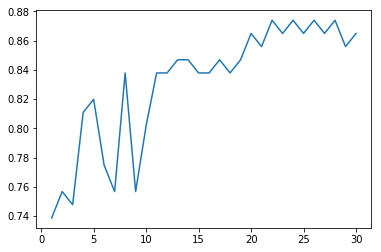

In [8]:
def retrieve_train_data(ith_fold):
    with open('knn/data'+str(ith_fold)+'.csv', 'r') as data_file:
        data = np.int16(np.array(list(csv.reader(data_file))))
    with open('knn/labels'+str(ith_fold)+'.csv', 'r') as label_file:
        label = np.int16(np.array(list(csv.reader(label_file))).ravel())
        return data, label
def knn(data_train, label_train, k, x):
    euclidean_dist = np.empty(len(data_train), \
                              dtype=[('x',np.int16),('y',np.int16)])
    for item in range(len(data_train)):
        entry = (np.int16(data_train[item]) - np.int16(x))**2
        entry = (entry.sum(), label_train[item])
        euclidean_dist[item]=entry
    euclidean_dist.sort(order='x')
    count=0
    for i in range(k):
        if (euclidean_dist[i][1] == 5):
            count += 1
    if (count >= (k - count)):
        return 5
    else:
        return 6

if __name__=='__main__':
    k_max = 30
    number_of_folds = 10
    acc=np.empty(k_max)
    for k in range(k_max):
        data_train=np.empty((0,64),dtype=np.int16)
        label_train=np.empty((0),dtype=np.int16)
        k+=1
        for fold in range(number_of_folds):
            fold+=1
            if (fold != k):
                data_train_fold,label_train_fold=retrieve_train_data(fold)
                data_train=np.concatenate((data_train, data_train_fold))
                label_train=np.concatenate((label_train, label_train_fold))
            else:
                data_test,label_test=retrieve_train_data(fold)
        sum=0
        count=0
        for i in range(len(data_test)):
            sum+=1
            if (knn(data_train,label_train,k,data_test[i])==label_test[i]):
                count+=1
        acc[k-1]=count / sum
        print('k = {:3d}   accuracy is {}'.format(k,acc[k-1]))
    print(acc)
    plt.plot(range(1,k_max+1,1), acc)
    plt.show()
        


In [9]:
data_train_1, label_train_1 = retrieve_train_data(1)
print(label_train_1)

[6 5 6 5 6 6 6 6 5 6 6 5 5 6 6 6 6 5 5 5 6 6 6 5 6 6 6 5 5 5 5 6 5 5 5 5 5
 5 5 6 6 5 6 5 5 6 5 6 5 6 5 6 5 6 6 5 5 6 5 5 6 6 5 5 5 5 6 5 6 6 5 6 5 5
 5 6 6 5 6 6 6 5 5 6 6 5 5 6 6 5 6 6 6 6 6 5 5 6 6 6 6 6 5 6 6 6 5 5 5 6 5]


In [10]:
knn(data_train_1, label_train_1, 1, data_train_1[109])

6